## Final Project Submission

Please fill out:
* Student name: Martin Ngugi
* Student pace: full time
* Scheduled project review date/time: 09/07/2023
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

## Introduction
Real estate is one of the most important sectors of any economy. Understanding the key drivers ofhousing prices can provide valuable insights for both buyers and sellers in the market. In thisproject, we analyze a data set of house sales in a northwestern county to identify the factors that influence housing prices in the area.

## Business Understanding
The real estate agency helps homeowners buy or sell homes. One of the key services they provide is advice to homeowners about how home renovations can increase the estimated value oftheir homes. The agency is interested in developing a model that can predict the estimated value ofa home after renovations, based on the type and cost of the renovations.

## Business Problem
The real estate agency needs to provide accurate advice to homeowners about how home
renovations can increase the estimated value of their homes, and by what amount. However, the
agency currently lacks a reliable method for predicting the impact of specific home renovations on
home value. As a result, the agency is unable to provide accurate advice to homeowners about the
potential return on investment for different renovation projects.
The project objectives we aim to solve include:
1. To identify features influencing the pricing.
2. To analyse trends in house prices over time (time series analysis) and predict future prices.
3. To identify undervalued properties (outlier detection) and recommend better pricing strategies.

## Data Understanding
The relevant dataset used in this project is the kc_house_data, found in the data folder of this
repository.
The dataset contains information on sale prices for houses, property sizes, location, and the years of
construction and renovation alongside other relavant information.

In [7]:
conda install -c conda-forge/label/gcc7 missingno

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\Hp\anaconda3\envs\learn-env

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2018.10.15 |       ha4d7672_0         170 KB  conda-forge/label/gcc7
    missingno-0.4.1            |             py_0          10 KB  conda-forge/label/gcc7
    openssl-1.1.1u             |       h2bbff1b_0         5.5 MB
    scipy-1.9.3                |  py310hb9afe5d_1        18.2 MB
    ------------------------------------------------------------
                                           Total:        23.9 MB

The following NEW packages will be INSTALLED:

  icc_rt             pkgs/main/win-64::icc_rt-2022.1.0-h6049295_2 
  missingno          conda-forge/label/gcc7/noarch::missingno-0.4.1-py_0 
  scipy              pkg



==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0




In [10]:
conda install -c conda-forge folium

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0





Solving environment: ...working... done

## Package Plan ##

  environment location: c:\Users\Hp\anaconda3\envs\learn-env

  added / updated specs:
    - folium


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.6.0               |     pyhd8ed1ab_0          27 KB  conda-forge
    ca-certificates-2023.5.7   |       h56e8100_0         145 KB  conda-forge
    certifi-2023.5.7           |     pyhd8ed1ab_0         149 KB  conda-forge
    charset-normalizer-3.1.0   |     pyhd8ed1ab_0          44 KB  conda-forge
    folium-0.14.0              |     pyhd8ed1ab_0          71 KB  conda-forge
    pysocks-1.7.1              |     pyh0701188_6          19 KB  conda-forge
    requests-2.31.0            |     pyhd8ed1ab_0          55 KB  conda-forge
    urllib3-2.0.3              |     pyhd8ed1ab_0          96 KB  conda-forge
    win_inet_pton-1.1.0        |     pyhd8ed1ab_6           8 KB  co

In [2]:
pip install scikit-learn scipy matplotlib numpy

  Using cached scikit_learn-1.3.0-cp310-cp310-win_amd64.whl (9.2 MB)
     ------------------------------------- 302.0/302.0 kB 38.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Loading the libraries
# data
import numpy as np
import pandas as pd
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium
import warnings
# modeling
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# statistics
import scipy.stats as stats
from sklearn.metrics import mean_absolute_error
# styling
plt.style.use('seaborn')
sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

C:\Users\Hp\AppData\Local\Temp\ipykernel_2988\3721497923.py:19: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
house_df = pd.read_csv('kc_house_data.csv')
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
data = house_df.copy()

In [13]:
def explore_data(df):
    '''
    Print some basic statistics and information about the DataFrame
    '''
    print("Number of rows:", df.shape[0])
    print("Number of columns:", df.shape[1])
    print("Data types:\n", df.dtypes)
    print("info:\n", df.info())
    print("columns:", df.columns)
    print("Head:\n", df.head())
    print("Tail:\n", df.tail())
    print("statistical summary:\n", df.describe())
    print("Missing values:\n", df.isnull().sum())
    print("duplicated values:\n", df.duplicated)
    #the correlation of other features with the price
    print("correlation with the price:\n", df.corr()['price'])
    print("condition column:\n", df['condition'].value_counts())
    print("grade column:\n", df['grade'].value_counts())
    print("view column:\n", df['view'].value_counts())

In [14]:
explore_data(data)

Number of rows: 21597
Number of columns: 21
Data types:
 id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-n

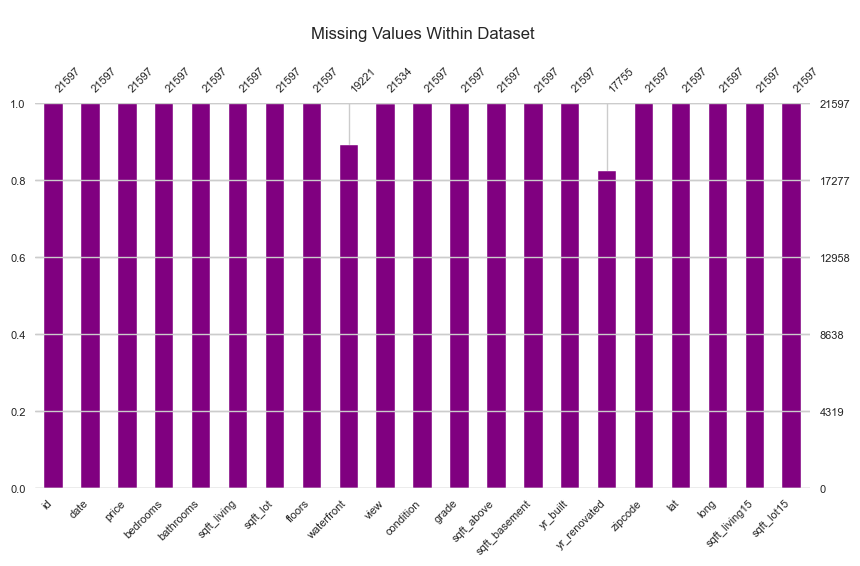

In [15]:
# Visualise the missing values in the dataset
msno.bar(data, color='purple', figsize=(10, 5), fontsize=8)
plt.title("""
Missing Values Within Dataset
""");

In [16]:
# percentage of missing data
house_df.isnull().sum()/len(house_df)*100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

In [17]:
#Dropped all the missing values in our data because 11% and 17% are too big
house_df.dropna(inplace=True)

## Data Cleaning and Preparation

In [18]:
def clean_data(df):
    '''
    Clean data by removing missing values and duplicates
    '''
    # Remove duplicates
    df.drop_duplicates(inplace=True)
    # Replace "?" and " " values with NaN
    df['sqft_basement'] = df['sqft_basement'].replace('?', np.nan).replace('', np.nan)
    # Convert the column to float data type
    df['sqft_basement'] = df['sqft_basement'].astype(float)
    # Convert the 'date' column to a datetime data type
    df['date'] = pd.to_datetime(df['date'])
    #Converting the 'waterfront' column to a binary variable where 1 represents 'YES' a
    df['waterfront'] = df['waterfront'].apply(lambda x: 1 if x == 'YES' else 0)
    # Remove missing values
    df.dropna(inplace=True)
    return df

In [19]:
clean_data(data)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [20]:
#confirmation of the cleaned data
explore_data(data)

Number of rows: 17340
Number of columns: 21
Data types:
 id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                     object
condition                object
grade                    object
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17340 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             17340 non-null  int64     

## Data Analysis
Converting the data types for sqft_basement and date columns to float and datetime
respectively.

In [22]:
# Replace "?" and " " values with NaN
house_df['sqft_basement'] = house_df['sqft_basement'].replace('?', np.nan).replace('', np.nan)
# Convert the column to float data type
house_df['sqft_basement'] = house_df['sqft_basement'].astype(float)
# Convert the 'date' column to a datetime data type
house_df['date'] = pd.to_datetime(house_df['date'])

In [23]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             15762 non-null  int64         
 1   date           15762 non-null  datetime64[ns]
 2   price          15762 non-null  float64       
 3   bedrooms       15762 non-null  int64         
 4   bathrooms      15762 non-null  float64       
 5   sqft_living    15762 non-null  int64         
 6   sqft_lot       15762 non-null  int64         
 7   floors         15762 non-null  float64       
 8   waterfront     15762 non-null  object        
 9   view           15762 non-null  object        
 10  condition      15762 non-null  object        
 11  grade          15762 non-null  object        
 12  sqft_above     15762 non-null  int64         
 13  sqft_basement  15429 non-null  float64       
 14  yr_built       15762 non-null  int64         
 15  yr_renovated   1576

## Univariate Analysis
Visualizing categorical variables in the data

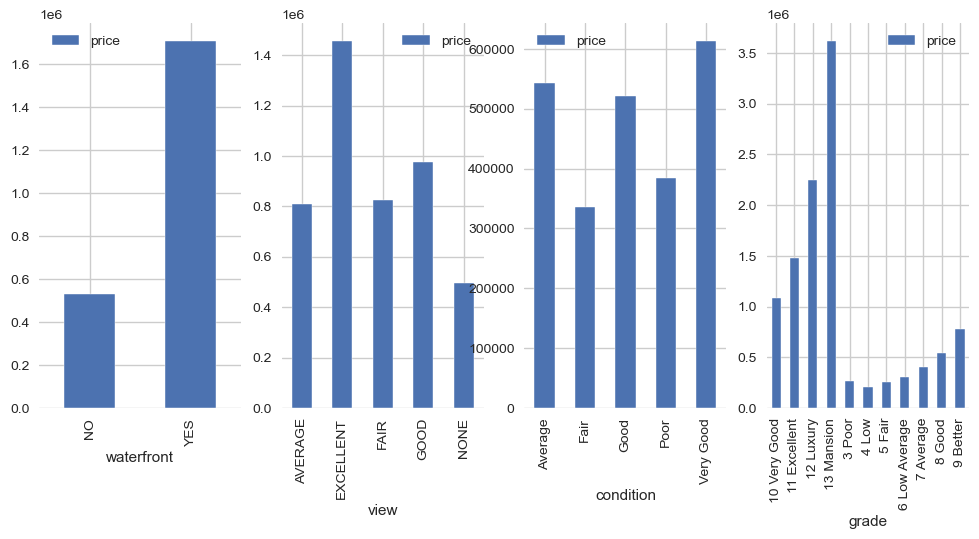

In [25]:
categorical_features = house_df.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12,5))
for index, feature in enumerate(categorical_features):
    house_df.groupby(feature).mean().plot.bar(
        y="price", ax=axes[index])

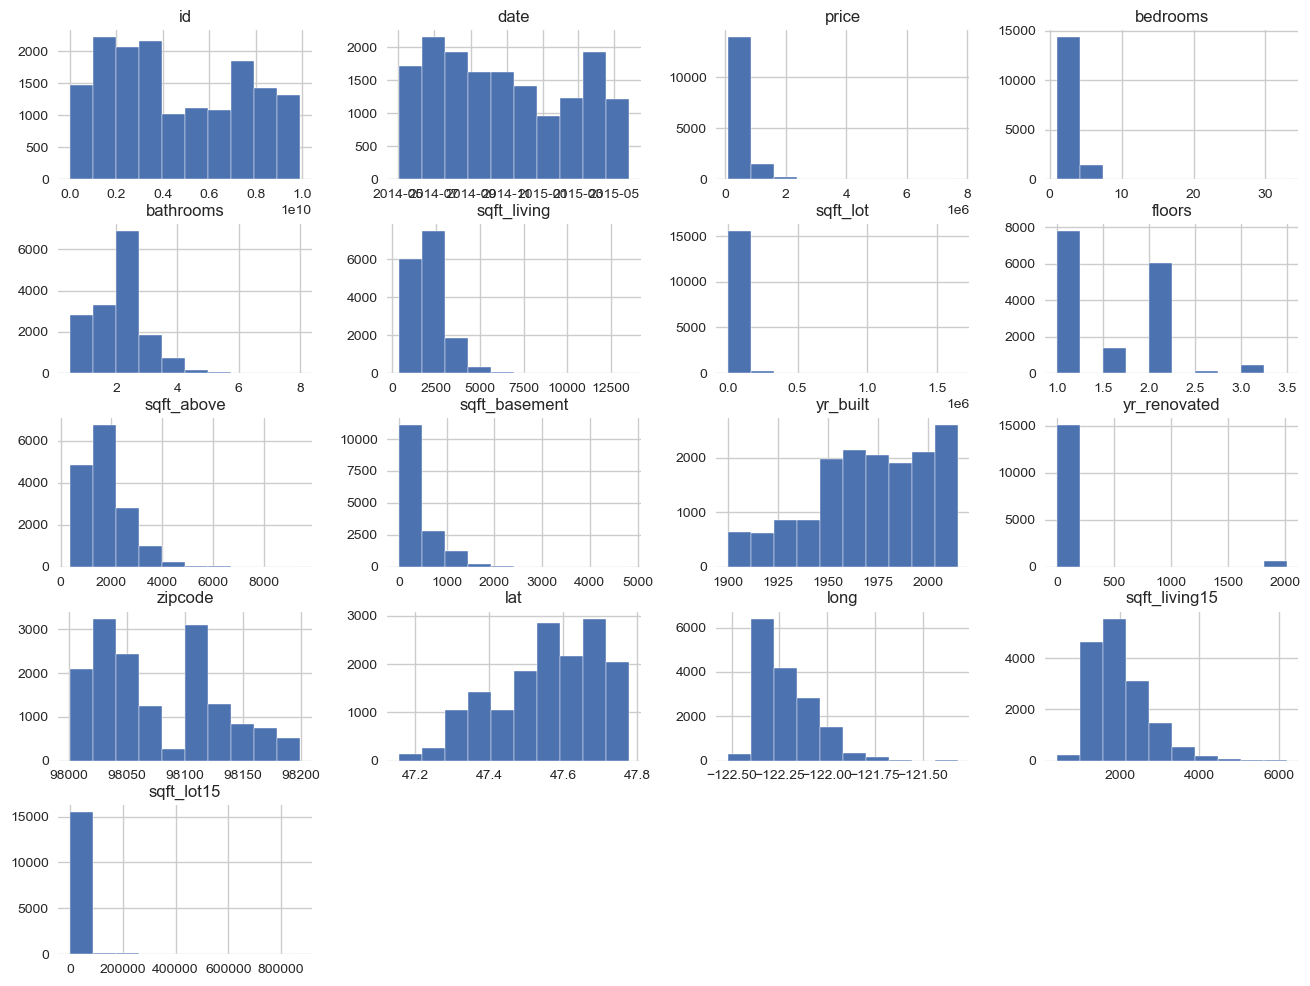

In [26]:
#Visualizing our numerical variables
house_df.hist(figsize=(16,12));

Visualizing the price column alone

In [29]:
# Function to plot the histogram, kde and boxplot of the data
def plot_distribution(df, col, title, bins_=10):
    ''' Plots the distribution of a column in a dataframe as a histogram, kde and boxplot'''
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (1, 3)})
    # assign a graph to each ax
    sns.boxplot(df[col], ax=ax_box, color='lightgreen')
    sns.histplot(data=df, x=col, ax=ax_hist, kde=True, color='lightblue', bins=bins_,alpha=0.5)
    plt.suptitle(title)
    plt.tight_layout();

Visualise the data distribution

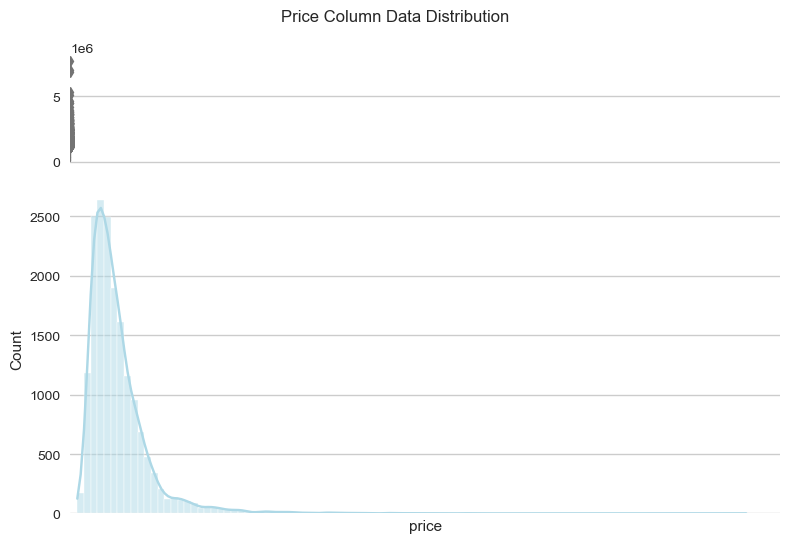

In [30]:
plot_distribution(data, 'price', 'Price Column Data Distribution', 100)

It is best to log transform this feature in order to normalize it, Since we will be using price as our target variable.

In [ ]:
# calculating the log of price
house_df["log(price)"] = np.log(house_df["price"])
#Visualize the price using the logprice column after log transformation
sns.distplot(house_df['log(price)'], kde=True);